In [31]:
# Using the PyWavelets module, available at 
# https://pywavelets.readthedocs.io/en/latest/install.html
import cv2
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os
import pywt
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

A = imread('../dog.jpg')
B = np.mean(A, -1); # Convert RGB to grayscale
height = 1024
width = 1024
B = cv2.resize(B, (width, height), interpolation=cv2.INTER_AREA)

In [32]:
## Wavelet Compression
n = 2
w = 'db1'
coeffs = pywt.wavedec2(B,wavelet=w,level=n)

coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs)

Csort = np.sort(np.abs(coeff_arr.reshape(-1)))

keep =0.005

In [33]:
coeff_arr.shape

(1024, 1024)

In [34]:
coeff_slices

[(slice(None, 256, None), slice(None, 256, None)),
 {'ad': (slice(None, 256, None), slice(256, 512, None)),
  'da': (slice(256, 512, None), slice(None, 256, None)),
  'dd': (slice(256, 512, None), slice(256, 512, None))},
 {'ad': (slice(None, 512, None), slice(512, 1024, None)),
  'da': (slice(512, 1024, None), slice(None, 512, None)),
  'dd': (slice(512, 1024, None), slice(512, 1024, None))}]

In [35]:
thresh = Csort[int(np.floor((1-keep)*len(Csort)))]
ind = np.abs(coeff_arr) > thresh
Cfilt = coeff_arr * ind # Threshold small indices

In [36]:
Cfilt.shape

(1024, 1024)

In [22]:
coeffs_filt = pywt.array_to_coeffs(Cfilt,coeff_slices,output_format='wavedec2')

In [ ]:
# Plot reconstruction
Arecon = pywt.waverec2(coeffs_filt,wavelet=w)
plt.figure()
plt.imshow(Arecon.astype('uint8'),cmap='gray')
plt.axis('off')
plt.title('keep = ' + str(keep))

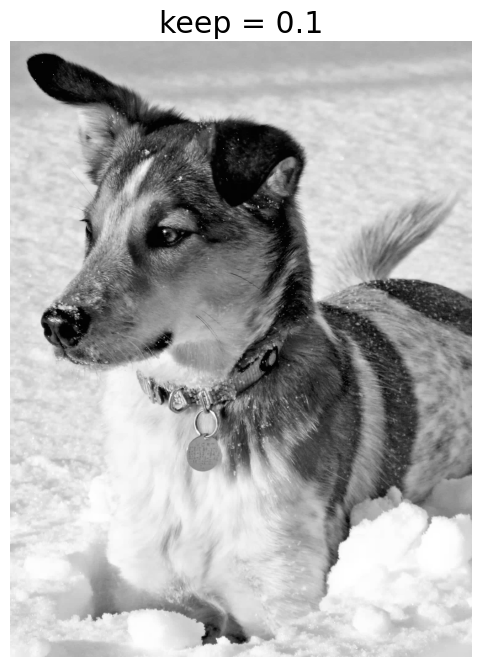

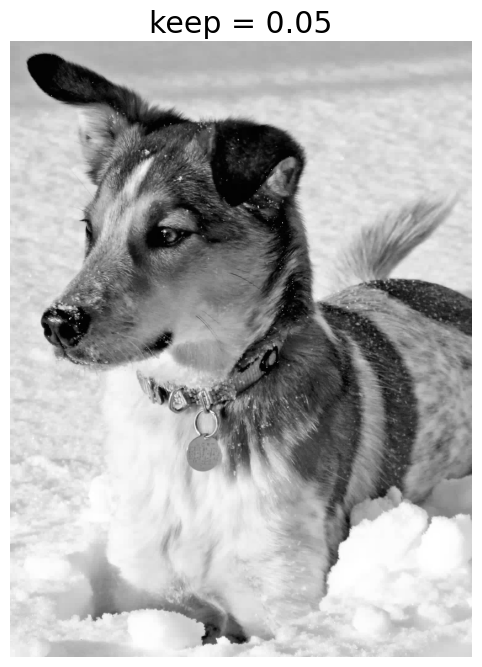

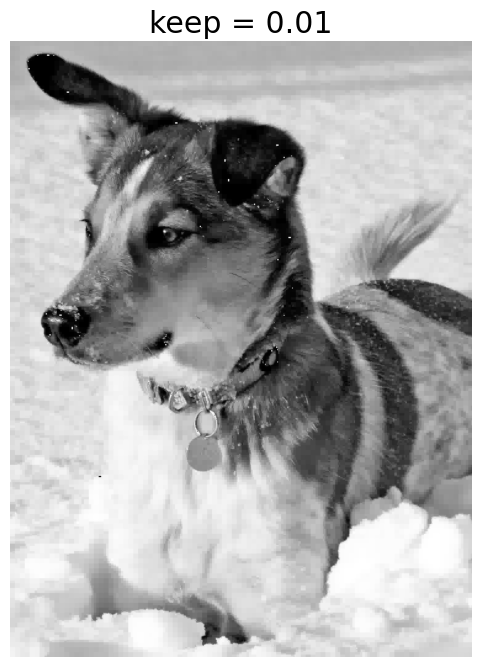

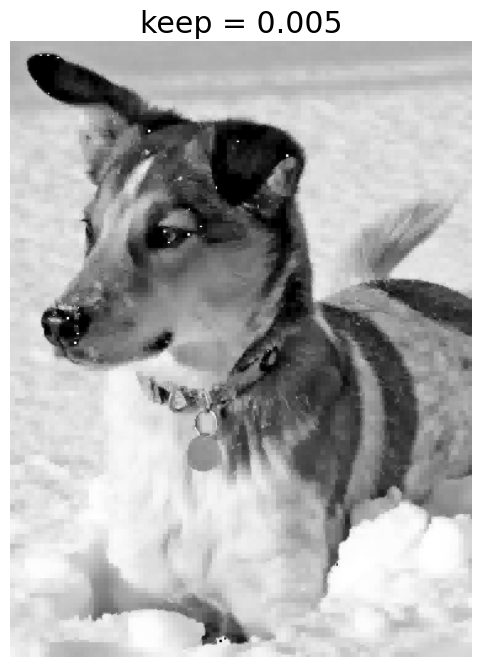

In [3]:
## Wavelet Compression
n = 4
w = 'db1'
coeffs = pywt.wavedec2(B,wavelet=w,level=n)

coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs)

Csort = np.sort(np.abs(coeff_arr.reshape(-1)))

for keep in (0.1, 0.05, 0.01, 0.005):
    thresh = Csort[int(np.floor((1-keep)*len(Csort)))]
    ind = np.abs(coeff_arr) > thresh
    Cfilt = coeff_arr * ind # Threshold small indices
    
    coeffs_filt = pywt.array_to_coeffs(Cfilt,coeff_slices,output_format='wavedec2')
    
    # Plot reconstruction
    Arecon = pywt.waverec2(coeffs_filt,wavelet=w)
    plt.figure()
    plt.imshow(Arecon.astype('uint8'),cmap='gray')
    plt.axis('off')
    plt.title('keep = ' + str(keep))
